# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:title={'center':'Weight and Height in adults'}, xlabel='Height', ylabel='Weight'>

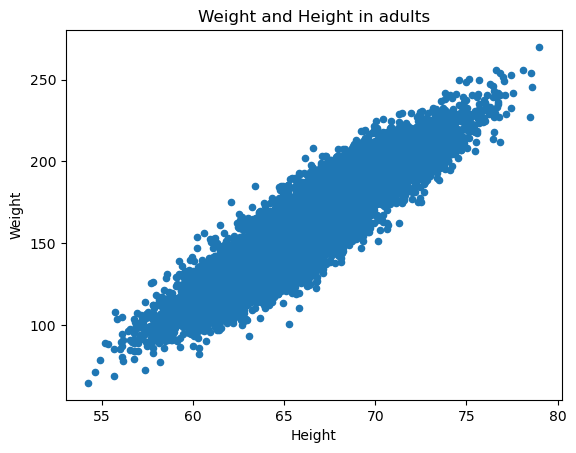

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

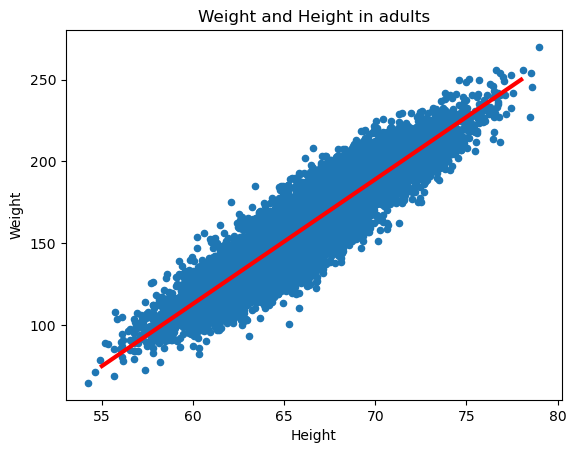

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

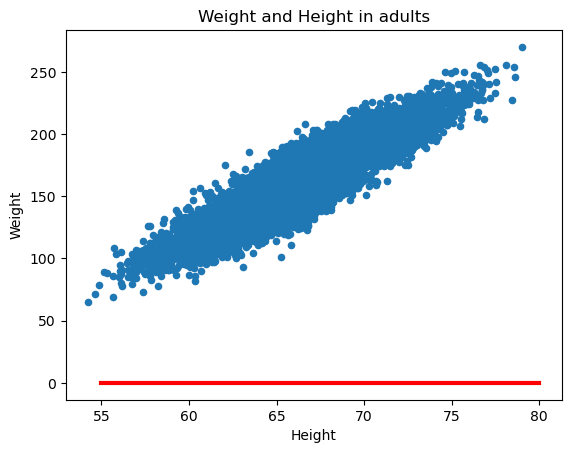

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

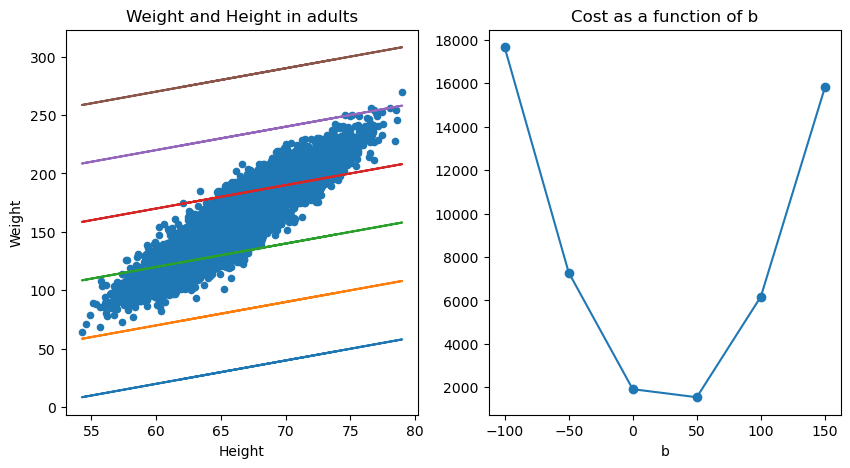

In [18]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

## Linear Regression with Keras

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [20]:
model = Sequential()

In [21]:
model.add(Dense(1, input_shape=(1,)))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [24]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 414us/step - loss: 818.1962
Epoch 2/40
313/313 [==============================] - 0s 397us/step - loss: 535.8715
Epoch 3/40
313/313 [==============================] - 0s 413us/step - loss: 518.5267
Epoch 4/40
313/313 [==============================] - 0s 397us/step - loss: 453.6750
Epoch 5/40
313/313 [==============================] - 0s 420us/step - loss: 416.8593
Epoch 6/40
313/313 [==============================] - 0s 439us/step - loss: 381.7662
Epoch 7/40
313/313 [==============================] - 0s 458us/step - loss: 334.9757
Epoch 8/40
313/313 [==============================] - 0s 453us/step - loss: 309.7137
Epoch 9/40
313/313 [==============================] - 0s 417us/step - loss: 279.3886
Epoch 10/40
313/313 [==============================] - 0s 426us/step - loss: 250.4168
Epoch 11/40
313/313 [==============================] - 0s 413us/step - loss: 236.6999
Epoch 12/40
313/313 [==============================] - 0s 407us

In [25]:
y_pred = model.predict(X)

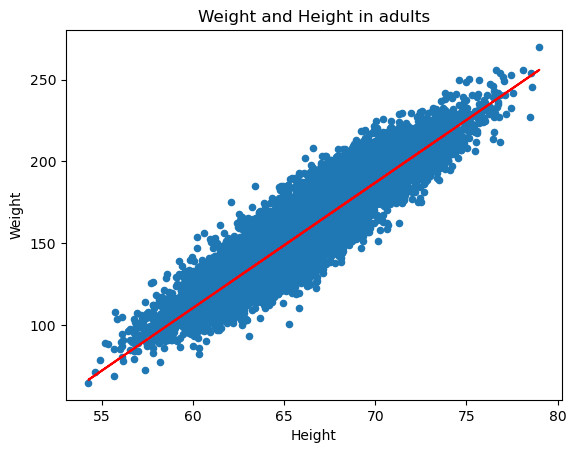

In [26]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [27]:
W, B = model.get_weights()

In [28]:
W

array([[7.6557946]], dtype=float32)

In [29]:
B

array([-348.8263], dtype=float32)

## Evaluating Model Performance

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.851


### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [34]:
len(X_train)

8000

In [35]:
len(X_test)

2000

In [36]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [37]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	213.4
The Mean Squared Error on the Test set is:	202.3


In [41]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.794
The R2 score on the Test set is:	0.800


# Classification

In [42]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (min)  100 non-null    float64
 1   Buy         100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [44]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


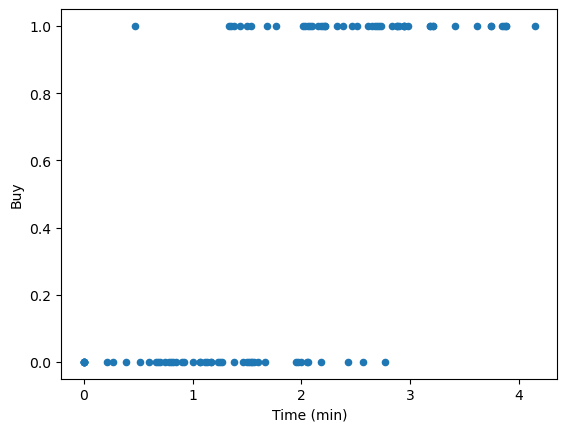

In [45]:
df.plot(kind='scatter', x='Time (min)', y='Buy');

In [46]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [47]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
4/4 [==============================] - 0s 667us/step - loss: 1.4048 - accuracy: 0.4800
Epoch 2/25
4/4 [==============================] - 0s 667us/step - loss: 0.6929 - accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 0s 666us/step - loss: 0.6676 - accuracy: 0.5200
Epoch 4/25
4/4 [==============================] - 0s 667us/step - loss: 0.6304 - accuracy: 0.6200
Epoch 5/25
4/4 [==============================] - 0s 665us/step - loss: 0.5762 - accuracy: 0.7100
Epoch 6/25
4/4 [==============================] - 0s 667us/step - loss: 0.5671 - accuracy: 0.6700
Epoch 7/25
4/4 [==============================] - 0s 667us/step - loss: 0.5460 - accuracy: 0.7500
Epoch 8/25
4/4 [==============================] - 0s 667us/step - loss: 0.5091 - accuracy: 0.7300
Epoch 9/25
4/4 [==============================] - 0s 666us/step - loss: 0.4892 - accuracy: 0.7900
Epoch 10/25
4/4 [==============================] - 0s 667us/step - loss: 0.4762 - accuracy: 0.8200
Epoch 11/25
4/4 [==

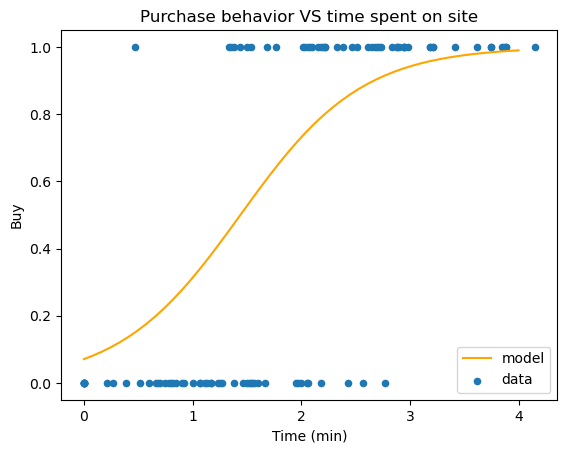

In [50]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [51]:
temp_class = model.predict(temp) > 0.5

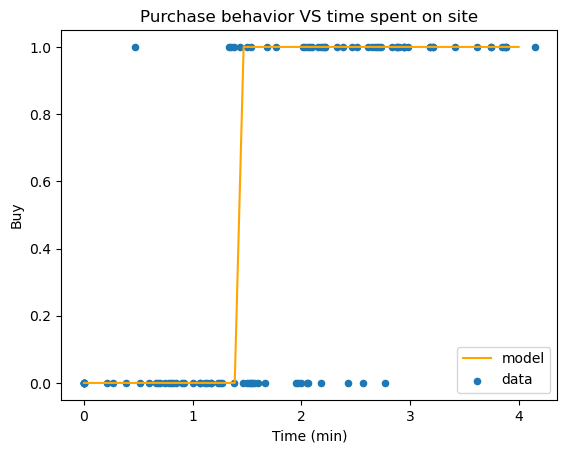

In [52]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [53]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.780


### Train/Test split


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [58]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [59]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [60]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.825
The test accuracy score is 0.850


## Cross Validation

In [61]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [62]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [63]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [64]:
from sklearn.model_selection import cross_val_score, KFold

In [65]:
cv = KFold(3, shuffle=True)

In [66]:
scores = cross_val_score(model, X, y, cv=cv)

In [67]:
scores

array([0.7647059 , 0.90909094, 0.75757575])

In [68]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8105 ± 0.0698


## Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y, y_class_pred)

array([[33, 17],
       [ 5, 45]], dtype=int64)

In [71]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [72]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,33,17
Buy,5,45


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [74]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.726
Recall:  	0.900
F1 Score:	0.804


In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75        50
           1       0.73      0.90      0.80        50

    accuracy                           0.78       100
   macro avg       0.80      0.78      0.78       100
weighted avg       0.80      0.78      0.78       100



## Feature Preprocessing

### Categorical Features

In [77]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [78]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [80]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [81]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [82]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [83]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


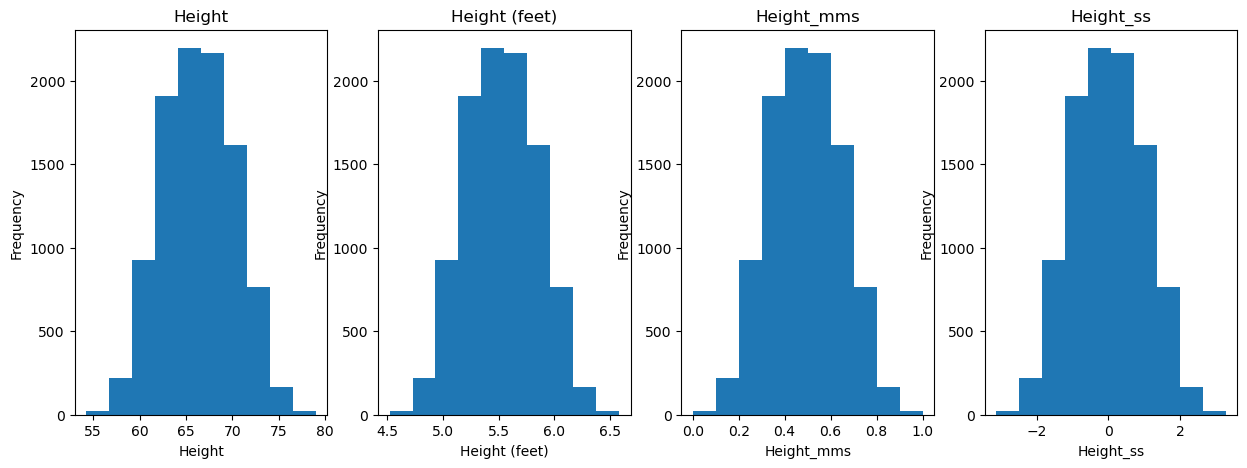

In [84]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature);

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [85]:
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


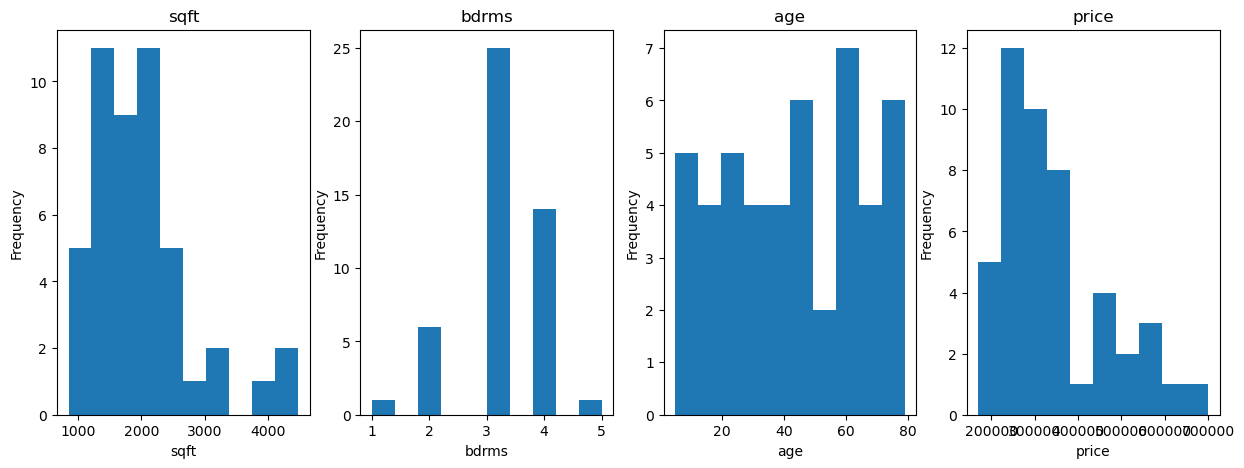

In [86]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [87]:
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

In [88]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [89]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [91]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

C:\Users\khair\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
len(X_train)

37

In [95]:
len(X)

47

In [96]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
2/2 [==============================] - 0s 1000us/step - loss: 125757038592.0000
Epoch 2/10
2/2 [==============================] - 0s 1ms/step - loss: 123405918208.0000
Epoch 3/10
2/2 [==============================] - 0s 1ms/step - loss: 121075630080.0000
Epoch 4/10
2/2 [==============================] - 0s 1ms/step - loss: 118830833664.0000
Epoch 5/10
2/2 [==============================] - 0s 1ms/step - loss: 116548829184.0000
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 114182144000.0000
Epoch 7/10
2/2 [==============================] - 0s 1ms/step - loss: 112004046848.0000
Epoch 8/10
2/2 [==============================] - 0s 999us/step - loss: 109806116864.0000
Epoch 9/10
2/2 [==============================] - 0s 1ms/step - loss: 107631124480.0000
Epoch 10/10
2/2 [==============================] - 0s 1000us/step - loss: 105419333632.0000


In [97]:
df['price'].max()

699900

In [98]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [99]:
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [100]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(learning_rate=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 7.7739
Epoch 2/20
2/2 [==============================] - 0s 1000us/step - loss: 5.8970
Epoch 3/20
2/2 [==============================] - 0s 1ms/step - loss: 6.5272
Epoch 4/20
2/2 [==============================] - 0s 999us/step - loss: 5.2395
Epoch 5/20
2/2 [==============================] - 0s 999us/step - loss: 3.3513
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 2.5190
Epoch 7/20
2/2 [==============================] - 0s 999us/step - loss: 2.5944
Epoch 8/20
2/2 [==============================] - 0s 1ms/step - loss: 2.5828
Epoch 9/20
2/2 [==============================] - 0s 1ms/step - loss: 1.9305
Epoch 10/20
2/2 [==============================] - 0s 0s/step - loss: 1.1312
Epoch 11/20
2/2 [==============================] - 0s 1ms/step - loss: 0.7351
Epoch 12/20
2/2 [==============================] - 0s 998us/step - loss: 0.8529
Epoch 13/20
2/2 [==============================] - 0s 1ms/step 

In [103]:
from sklearn.metrics import r2_score

In [104]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.611
The R2 score on the Test set is:	0.514


In [105]:
model.fit(X_train, y_train, epochs=20, verbose=0)

In [106]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.716
The R2 score on the Test set is:	0.764


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [107]:
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [109]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [110]:
df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

<AxesSubplot:ylabel='Frequency'>

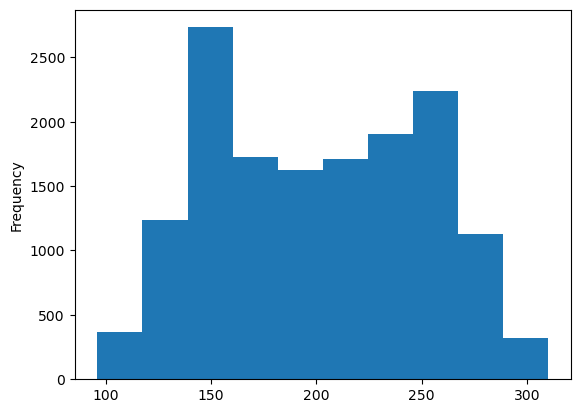

In [111]:
df['average_montly_hours'].plot(kind='hist')

In [112]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

<AxesSubplot:ylabel='Frequency'>

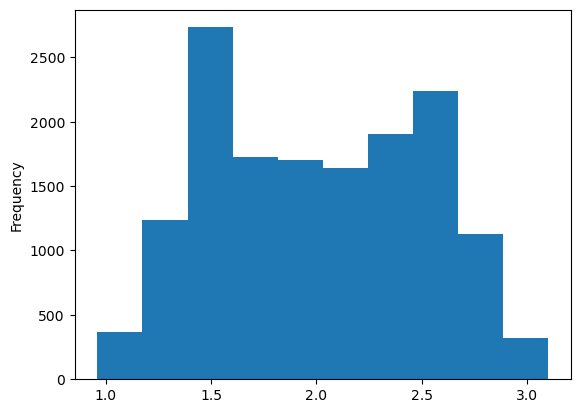

In [113]:
df['average_montly_hours_100'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

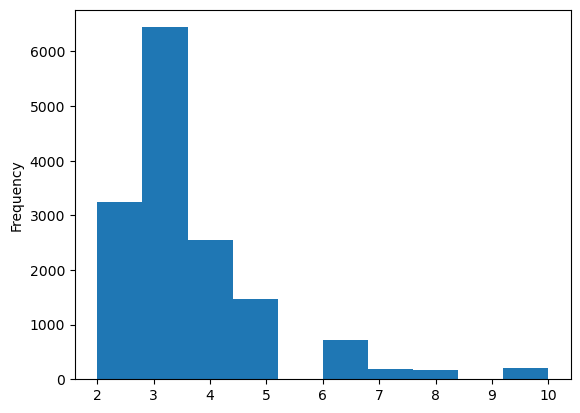

In [114]:
df['time_spend_company'].plot(kind='hist')

In [115]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [116]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [117]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [118]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [119]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident', 'promotion_last_5years',
                   'average_montly_hours_100']],
        df_dummies], axis=1).values
y = df['left'].values

In [120]:
X.shape

(14999, 20)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
X_train.shape

(11999, 20)

In [123]:
y_train.shape

(11999,)

In [124]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [125]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=1)

Epoch 1/10
11999/11999 [==============================] - 5s 426us/step - loss: 1.9844 - accuracy: 0.7251
Epoch 2/10
11999/11999 [==============================] - 5s 424us/step - loss: 1.9523 - accuracy: 0.7266
Epoch 3/10
11999/11999 [==============================] - 5s 426us/step - loss: 2.0635 - accuracy: 0.7293
Epoch 4/10
11999/11999 [==============================] - 5s 429us/step - loss: 2.1281 - accuracy: 0.7255
Epoch 5/10
11999/11999 [==============================] - 5s 428us/step - loss: 2.0488 - accuracy: 0.7291
Epoch 6/10
11999/11999 [==============================] - 5s 421us/step - loss: 1.9800 - accuracy: 0.7241
Epoch 7/10
11999/11999 [==============================] - 5s 427us/step - loss: 1.9561 - accuracy: 0.7298
Epoch 8/10
11999/11999 [==============================] - 5s 422us/step - loss: 2.0678 - accuracy: 0.7345
Epoch 9/10
11999/11999 [==============================] - 5s 434us/step - loss: 2.0012 - accuracy: 0.7287
Epoch 10/10
11999/11999 [=====================

In [127]:
y_test_pred = model.predict_classes(X_test, verbose=1, batch_size=1)

 508/3000 [====>.........................] - ETA: 0s

C:\Users\khair\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3000/3000 [==============================] - 1s 295us/step


In [128]:
from sklearn.metrics import confusion_matrix, classification_report

In [129]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", 'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted'+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [130]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,PredictedStay,PredictedLeave
Stay,1103,1185
Leave,71,641


In [131]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      2288
           1       0.35      0.90      0.51       712

    accuracy                           0.58      3000
   macro avg       0.65      0.69      0.57      3000
weighted avg       0.80      0.58      0.61      3000



In [132]:
from keras.wrappers.scikit_learn import KerasClassifier

In [133]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=10, verbose=0)

In [134]:
from sklearn.model_selection import KFold, cross_val_score

In [135]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} -+ {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7787 -+ 0.0173


In [136]:
scores

array([0.78299999, 0.75166667, 0.77033335, 0.78433335, 0.80426806])